In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [108]:
pit = pd.read_csv("Pittsburgh bridges.csv")

In [109]:
#taking care of missing value
pit = pit.replace('?',np.nan)
pit = pit.dropna(axis=0, how='any')
pit.head()


,IDENTIF,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L,TYPE
1,E2,A,25,1819,HIGHWAY,1037,2,N,THROUGH,WOOD,SHORT,S,WOOD
3,E5,A,29,1837,HIGHWAY,1000,2,N,THROUGH,WOOD,SHORT,S,WOOD
5,E7,A,27,1840,HIGHWAY,990,2,N,THROUGH,WOOD,MEDIUM,S,WOOD
6,E8,A,28,1844,AQUEDUCT,1000,1,N,THROUGH,IRON,SHORT,S,SUSPEN
7,E9,M,3,1846,HIGHWAY,1500,2,N,THROUGH,IRON,SHORT,S,SUSPEN


In [110]:
#preprocessing
pd.get_dummies(pit[['IDENTIF','RIVER','PURPOSE','CLEAR-G','T-OR-D','MATERIAL','SPAN','REL-L','TYPE']]).head() 

,IDENTIF_E101,IDENTIF_E102,IDENTIF_E103,IDENTIF_E105,IDENTIF_E107N,IDENTIF_E108,IDENTIF_E11,IDENTIF_E14,IDENTIF_E16,IDENTIF_E18,...,SPAN_SHORT,REL-L_F,REL-L_S,REL-L_S-F,TYPE_ARCH,TYPE_CANTILEV,TYPE_CONT-T,TYPE_SIMPLE-T,TYPE_SUSPEN,TYPE_WOOD
1,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
7,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


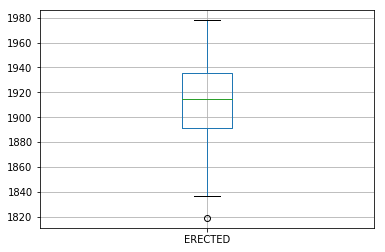

In [111]:
boxplot=pit.boxplot(column='ERECTED') #boxplot

In [112]:
pit.corr(method='pearson')  #correllation

,ERECTED
ERECTED,1.0


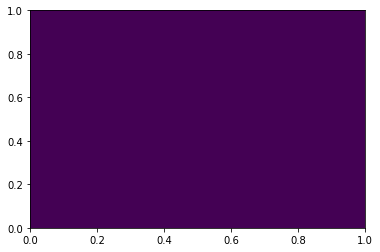

In [113]:
pearson_corr= pit.corr(method = "pearson") #heatmap
plt.pcolor(pearson_corr)
plt.show()

In [114]:
#adition feature
import random as rd
factor_of_safety = []
cost = []
for i in range(pit.shape[0]):
    factor_of_safety += [round(rd.uniform(1,2),1)]
    cost += [rd.randint(10,100)]

In [115]:
pit['factor_of_safety']=factor_of_safety
pit['cost(million dollars)']=cost

In [116]:
pit.head()

,IDENTIF,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L,TYPE,factor_of_safety,cost(million dollars)
1,E2,A,25,1819,HIGHWAY,1037,2,N,THROUGH,WOOD,SHORT,S,WOOD,1.7,62
3,E5,A,29,1837,HIGHWAY,1000,2,N,THROUGH,WOOD,SHORT,S,WOOD,1.8,19
5,E7,A,27,1840,HIGHWAY,990,2,N,THROUGH,WOOD,MEDIUM,S,WOOD,1.9,18
6,E8,A,28,1844,AQUEDUCT,1000,1,N,THROUGH,IRON,SHORT,S,SUSPEN,1.1,64
7,E9,M,3,1846,HIGHWAY,1500,2,N,THROUGH,IRON,SHORT,S,SUSPEN,1.5,12
